# Importing all the necessory libraries

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
Genderdf=pd.read_csv('gender_submission.csv')
Genderdf

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [217]:
Test_df=pd.read_csv('test.csv')
Test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [218]:
Train_df=pd.read_csv('train.csv')
Train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Checking the Null values and removing them.

In [219]:
Train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age contains 20 percent of data as Unknown.

678 people dont have cabin number, Only those in higher socio-economic class have a cabin

0.2 percent of people doent have a Embarked feature.

# Creating New Columns based on the given Data

## Making a new column "Prefix" from the name.

In [220]:
Train_df.loc[0,'Name']

'Braund, Mr. Owen Harris'

In [221]:
Train_df['Name'].str.split(',')[0][1].split('.')[0]

' Mr'

In [222]:
Train_df['Prefix']=pd.Series(dtype= 'object')

In [223]:
for i in range(len(Train_df['Name'])):
    Train_df.loc[i,'Prefix']=Train_df['Name'].str.split(',')[i][1].split('.')[0]

In [224]:
Train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [225]:
Train_df['Prefix'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

## Making Deck column from Cabin

In [226]:
Train_df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [227]:
Train_df['Deck']= Train_df['Cabin'].str[0]

In [228]:
Train_df.loc[Train_df['Deck'].isna(),'Deck']='Unknown'

In [229]:
Train_df['Deck'].value_counts()

Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: Deck, dtype: int64

In [230]:
for i in range(0,890):
    if Train_df.loc[i,'Deck']=='Unknown':
        Train_df.loc[i,'havecabin']=0
    else:
        Train_df.loc[i,'havecabin']=1

## Making a column on total family members who are travelling with them

In [231]:
Train_df['Familymem']=Train_df['Parch']+Train_df['SibSp']

In [232]:
Train_df['Familymem'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Familymem, dtype: int64

In [233]:
Train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [234]:
Train_df[Train_df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Deck,havecabin,Familymem
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,B,1.0,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,B,1.0,0


In [235]:
child=(Train_df['Age']<18)
Train_df['Who']=Train_df['Sex']
Train_df.loc[child,'Who']='child'

In [236]:
Train_df['Age'].astype(float)
for i in range(0,891):
    if Train_df.loc[i,'Age']<2:
        Train_df.loc[i,'AgeGrp']='infant'
    elif Train_df.loc[i,'Age']<18:
        Train_df.loc[i,'AgeGrp']='child'
    elif Train_df.loc[i,'Age']<29:
        Train_df.loc[i,'AgeGrp']='Young'
    elif Train_df.loc[i,'Age']<65:
        Train_df.loc[i,'AgeGrp']='Adult'
    elif Train_df.loc[i,'Age']>=65:
        Train_df.loc[i,'AgeGrp']='Senior'
    else:
        Train_df.loc[i,'AgeGrp']='Unknown'
Train_df['AgeGrp'].value_counts()

Adult      339
Young      251
Unknown    177
child       99
infant      14
Senior      11
Name: AgeGrp, dtype: int64

# Data visualization

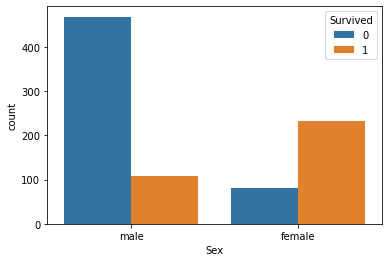

In [237]:
ax=sns.countplot(x='Sex',hue='Survived',data=Train_df)

In [238]:
surv=(Train_df['Survived']==1)
print('Percentage of Female Survived: ',(Train_df[surv]['Sex'].value_counts()['female'])/(Train_df['Sex'].value_counts()['female'])*100)
print('Percentage of Male Survived: ',(Train_df[surv]['Sex'].value_counts()['male'])/(Train_df['Sex'].value_counts()['male'])*100)

Percentage of Female Survived:  74.20382165605095
Percentage of Male Survived:  18.890814558058924


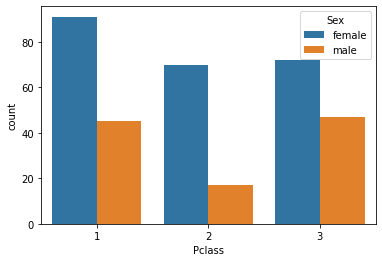

In [239]:
ax = sns.countplot(x="Pclass", hue="Sex", data=Train_df[Train_df['Survived']==1])

In [240]:
surv=(Train_df['Survived']==1)
fem=(Train_df['Sex']=='female')
print('Percentage of 1st Class Survived: ',(Train_df[surv]['Pclass'].value_counts()[1])/(Train_df['Pclass'].value_counts()[1])*100)
print('Percentage of 2nd Class Survived: ',(Train_df[surv]['Pclass'].value_counts()[2])/(Train_df['Pclass'].value_counts()[2])*100)
print('Percentage of 3rd Class Survived: ',(Train_df[surv]['Pclass'].value_counts()[3])/(Train_df['Pclass'].value_counts()[3])*100)
print('Percentage of 1st Class female Survived: ',(Train_df[surv&fem]['Pclass'].value_counts()[1])/(Train_df[fem]['Pclass'].value_counts()[1])*100)
print('Percentage of 2nd Class female Survived: ',(Train_df[surv&fem]['Pclass'].value_counts()[2])/(Train_df[fem]['Pclass'].value_counts()[2])*100)
print('Percentage of 3rd Class female Survived: ',(Train_df[surv&fem]['Pclass'].value_counts()[3])/(Train_df[fem]['Pclass'].value_counts()[3])*100)

Percentage of 1st Class Survived:  62.96296296296296
Percentage of 2nd Class Survived:  47.28260869565217
Percentage of 3rd Class Survived:  24.236252545824847
Percentage of 1st Class female Survived:  96.80851063829788
Percentage of 2nd Class female Survived:  92.10526315789474
Percentage of 3rd Class female Survived:  50.0


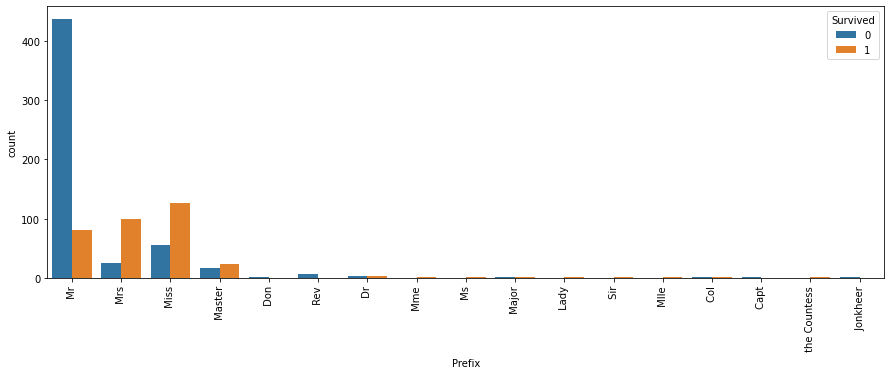

In [241]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="Prefix",hue='Survived', data=Train_df)
plt.xticks(label='Prefix',rotation=90)
plt.show()

<AxesSubplot:xlabel='havecabin', ylabel='count'>

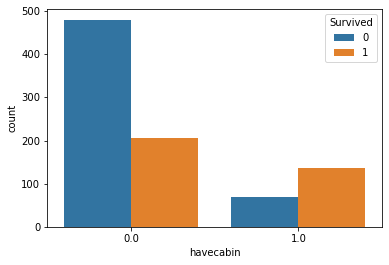

In [242]:
sns.countplot(x="havecabin", hue="Survived", data=Train_df)

In [243]:
surv=(Train_df['Survived']==1)
cabin=(Train_df['havecabin']==1)
print('Percentage of people having a cabin Survived: ',(Train_df[surv]['havecabin'].value_counts()[1])/(Train_df['havecabin'].value_counts()[1])*100)

Percentage of people having a cabin Survived:  66.66666666666666


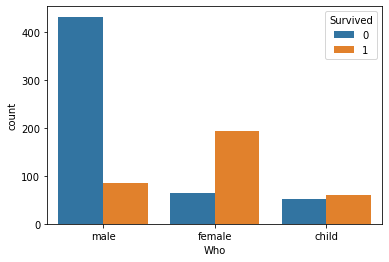

In [244]:
ax=sns.countplot(x='Who',hue='Survived',data=Train_df)

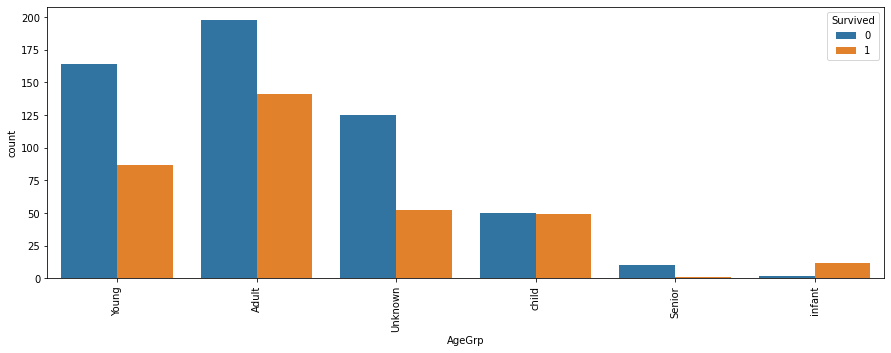

In [245]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="AgeGrp",hue='Survived', data=Train_df)
plt.xticks(label='AgeGrp',rotation=90)
plt.show()